# Phone Addiction Classification Project | Addiction among the youth

**MAIN GOAL**: Binary classifier which predicts the risk of phone addiction in teens based on lifestyle patterns.

**Dataset**: Kaggle: Teen Phone Addiction and Lifestyle Survey
**Author**: Nikolas Antoniou

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.facecolor'] = '#f8f9fa'
purple_palette = ['#6a0dad', '#8a2be2', '#9370db', '#ba55d3', '#da70d6', '#dda0dd']
sns.set_palette(purple_palette)

In [6]:
def load_dataset(filename):
    try:
        df = pd.read_csv(filename)
        print(f"Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        return df
    
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        print("Make sure the file is in the same folder as your notebook.")
        return None
    
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return None
    
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

In [7]:
filepath = 'datasets/teen_phone_addiction_dataset.csv'
df = load_dataset(filepath)

Dataset loaded successfully!
Shape: (3000, 25)


In [12]:
if df is not None:
    print("DATASET OVERVIEW")
    print("=" * 25)
    print(f"Number of teens: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

DATASET OVERVIEW
Number of teens: 3000
Number of features: 25


## Inspection Process

In [14]:
print("Columns belonging to the dataset:")
print("="*35)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Columns belonging to the dataset:
 1. ID
 2. Name
 3. Age
 4. Gender
 5. Location
 6. School_Grade
 7. Daily_Usage_Hours
 8. Sleep_Hours
 9. Academic_Performance
10. Social_Interactions
11. Exercise_Hours
12. Anxiety_Level
13. Depression_Level
14. Self_Esteem
15. Parental_Control
16. Screen_Time_Before_Bed
17. Phone_Checks_Per_Day
18. Apps_Used_Daily
19. Time_on_Social_Media
20. Time_on_Gaming
21. Time_on_Education
22. Phone_Usage_Purpose
23. Family_Communication
24. Weekend_Usage_Hours
25. Addiction_Level


In [15]:
print(f"Total Columns: {len(df.columns)}")

Total Columns: 25


In [17]:
print("Data types:")
print("="*50)
df.info()

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000

In [19]:
print("Data types summary:")
print("=" * 25)
print(df.dtypes.value_counts())

Data types summary:
int64      11
float64     9
object      5
Name: count, dtype: int64


## Checking for any missing value

In [22]:
print("Missing values:")
print("="*30)

missing_data = df.isnull().sum()
print(missing_data)

Missing values:
ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64


## Target variable

In [23]:
addiction_keywords = ['addiction', 'addicted', 'dependent', 'problem', 'usage', 'score']
potential_targets = []

In [24]:
for i in df.columns:
    for keyword in addiction_keywords:
        if keyword.lower() in i.lower():
            potential_targets.append(i)
            break

if potential_targets:
    print("Potential targets found:")
    for i in potential_targets:
        print(f"{i}")
        print(f"Unique values: {df[i].nunique()}")
        print(f"Value counts:\n{df[i].value_counts()}")
        print("-"*30)
else:
    print("There is no obvious target")
    print("Examinating the columns again:")
    for i in df.columns:
        if df[i].nunique() <= 10:
            print(f"{i}: {df[i].unique()}")

Potential targets found:
Daily_Usage_Hours
Unique values: 107
Value counts:
Daily_Usage_Hours
4.4     74
4.9     73
4.3     69
5.3     65
5.0     64
        ..
10.1     1
10.9     1
0.1      1
11.2     1
11.5     1
Name: count, Length: 107, dtype: int64
------------------------------
Phone_Usage_Purpose
Unique values: 5
Value counts:
Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64
------------------------------
Weekend_Usage_Hours
Unique values: 120
Value counts:
Weekend_Usage_Hours
6.2     70
5.7     69
5.3     64
6.8     64
6.6     63
        ..
11.6     1
11.8     1
11.3     1
11.4     1
0.4      1
Name: count, Length: 120, dtype: int64
------------------------------
Addiction_Level
Unique values: 80
Value counts:
Addiction_Level
10.0    1524
9.9       50
9.6       46
8.0       45
7.8       45
        ... 
2.0        1
2.6        1
4.0        1
2.4        1
3.6        1
Name: count, Len

Research says phone addiction includes:

Excessive usage (high daily hours), Sleep disruption (screen time before bed + low sleep), Social impact (poor social interactions), Academic impact (poor academic performance), Compulsive checking (high phone checks per day), Mental health (high anxiety/depression)

In [25]:
addiction_indicators = [
    'Daily_Usage_Hours',
    'Sleep_Hours', 
    'Phone_Checks_Per_Day',
    'Screen_Time_Before_Bed',
    'Academic_Performance',
    'Social_Interactions',
    'Anxiety_Level',
    'Depression_Level',
    'Addiction_Level'
]

In [26]:
for i in addiction_indicators:
    if i in df.columns:
        print(f"{i}:")
        print(f"   Range: {df[i].min()} - {df[i].max()}")
        print(f"   Mean: {df[i].mean():.2f}")
        print(f"   Unique values: {df[i].nunique()}")

Daily_Usage_Hours:
   Range: 0.0 - 11.5
   Mean: 5.02
   Unique values: 107
Sleep_Hours:
   Range: 3.0 - 10.0
   Mean: 6.49
   Unique values: 71
Phone_Checks_Per_Day:
   Range: 20 - 150
   Mean: 83.09
   Unique values: 131
Screen_Time_Before_Bed:
   Range: 0.0 - 2.6
   Mean: 1.01
   Unique values: 27
Academic_Performance:
   Range: 50 - 100
   Mean: 74.95
   Unique values: 51
Social_Interactions:
   Range: 0 - 10
   Mean: 5.10
   Unique values: 11
Anxiety_Level:
   Range: 1 - 10
   Mean: 5.59
   Unique values: 10
Depression_Level:
   Range: 1 - 10
   Mean: 5.46
   Unique values: 10
Addiction_Level:
   Range: 1.0 - 10.0
   Mean: 8.88
   Unique values: 80


In [27]:
def create_risk_factors(df):
    # High usage (top 25% of daily usage)
    high_usage_threshold = df['Daily_Usage_Hours'].quantile(0.75)
    df['Risk_High_Usage'] = (df['Daily_Usage_Hours'] >= high_usage_threshold).astype(int)
    
    # Poor sleep (bottom 25% of sleep hours)
    low_sleep_threshold = df['Sleep_Hours'].quantile(0.25)
    df['Risk_Poor_Sleep'] = (df['Sleep_Hours'] <= low_sleep_threshold).astype(int)
    
    # Excessive checking (top 25% of phone checks)
    high_checks_threshold = df['Phone_Checks_Per_Day'].quantile(0.75)
    df['Risk_Excessive_Checking'] = (df['Phone_Checks_Per_Day'] >= high_checks_threshold).astype(int)
    
    # Late night screen time (top 25% of screen time before bed)
    high_screen_threshold = df['Screen_Time_Before_Bed'].quantile(0.75)
    df['Risk_Late_Screen_Time'] = (df['Screen_Time_Before_Bed'] >= high_screen_threshold).astype(int)
    
    # Poor academic performance (bottom 25%)
    low_academic_threshold = df['Academic_Performance'].quantile(0.25)
    df['Risk_Poor_Academic'] = (df['Academic_Performance'] <= low_academic_threshold).astype(int)
    
    # Poor social interactions (bottom 25%)
    low_social_threshold = df['Social_Interactions'].quantile(0.25)
    df['Risk_Poor_Social'] = (df['Social_Interactions'] <= low_social_threshold).astype(int)
    
    # High anxiety (top 25%)
    high_anxiety_threshold = df['Anxiety_Level'].quantile(0.75)
    df['Risk_High_Anxiety'] = (df['Anxiety_Level'] >= high_anxiety_threshold).astype(int)
    
    # High depression (top 25%)
    high_depression_threshold = df['Depression_Level'].quantile(0.75)
    df['Risk_High_Depression'] = (df['Depression_Level'] >= high_depression_threshold).astype(int)
    
    return df

In [28]:
df = create_risk_factors(df)

In [30]:
print(f"High Usage: >= {df['Daily_Usage_Hours'].quantile(0.75):.1f} hours/day")
print(f"Poor Sleep: <= {df['Sleep_Hours'].quantile(0.25):.1f} hours/night")
print(f"Excessive Checking: >= {df['Phone_Checks_Per_Day'].quantile(0.75):.0f} checks/day")
print(f"Late Screen Time: >= {df['Screen_Time_Before_Bed'].quantile(0.75):.1f} hours")
print(f"Poor Academic: <= {df['Academic_Performance'].quantile(0.25):.1f}")
print(f"Poor Social: <= {df['Social_Interactions'].quantile(0.25):.1f}")
print(f"High Anxiety: >= {df['Anxiety_Level'].quantile(0.75):.1f}")
print(f"High Depression: >= {df['Depression_Level'].quantile(0.75):.1f}")

High Usage: >= 6.4 hours/day
Poor Sleep: <= 5.5 hours/night
Excessive Checking: >= 115 checks/day
Late Screen Time: >= 1.4 hours
Poor Academic: <= 62.0
Poor Social: <= 2.0
High Anxiety: >= 8.0
High Depression: >= 8.0


In [31]:
risk_columns = [
    'Risk_High_Usage',
    'Risk_Poor_Sleep', 
    'Risk_Excessive_Checking',
    'Risk_Late_Screen_Time',
    'Risk_Poor_Academic',
    'Risk_Poor_Social',
    'Risk_High_Anxiety',
    'Risk_High_Depression'
]

In [32]:
df['Total_Risk_Score'] = df[risk_columns].sum(axis=1)
print("Risk score distribution:")
print(df['Total_Risk_Score'].value_counts().sort_index())

Risk score distribution:
Total_Risk_Score
0    245
1    741
2    939
3    653
4    288
5    111
6     21
7      2
Name: count, dtype: int64


In [34]:
# Research suggests 3+ risk factors = addiction
addiction_threshold = 3
df['Is_Phone_Addicted'] = (df['Total_Risk_Score'] >= addiction_threshold).astype(int)
print(f"Addiction Classification (>= {addiction_threshold} risk factors):")
addiction_counts = df['Is_Phone_Addicted'].value_counts()
print(f"Non-Addicted (0): {addiction_counts[0]} teens ({addiction_counts[0]/len(df)*100:.1f}%)")
print(f"Addicted (1): {addiction_counts[1]} teens ({addiction_counts[1]/len(df)*100:.1f}%)")

Addiction Classification (>= 3 risk factors):
Non-Addicted (0): 1925 teens (64.2%)
Addicted (1): 1075 teens (35.8%)


In [35]:
print(f"BREAKDOWN:")
for i in range(9):
    count = (df['Total_Risk_Score'] == i).sum()
    if count > 0:
        print(f"{i} risk factors: {count} teens ({count/len(df)*100:.1f}%)")

BREAKDOWN:
0 risk factors: 245 teens (8.2%)
1 risk factors: 741 teens (24.7%)
2 risk factors: 939 teens (31.3%)
3 risk factors: 653 teens (21.8%)
4 risk factors: 288 teens (9.6%)
5 risk factors: 111 teens (3.7%)
6 risk factors: 21 teens (0.7%)
7 risk factors: 2 teens (0.1%)


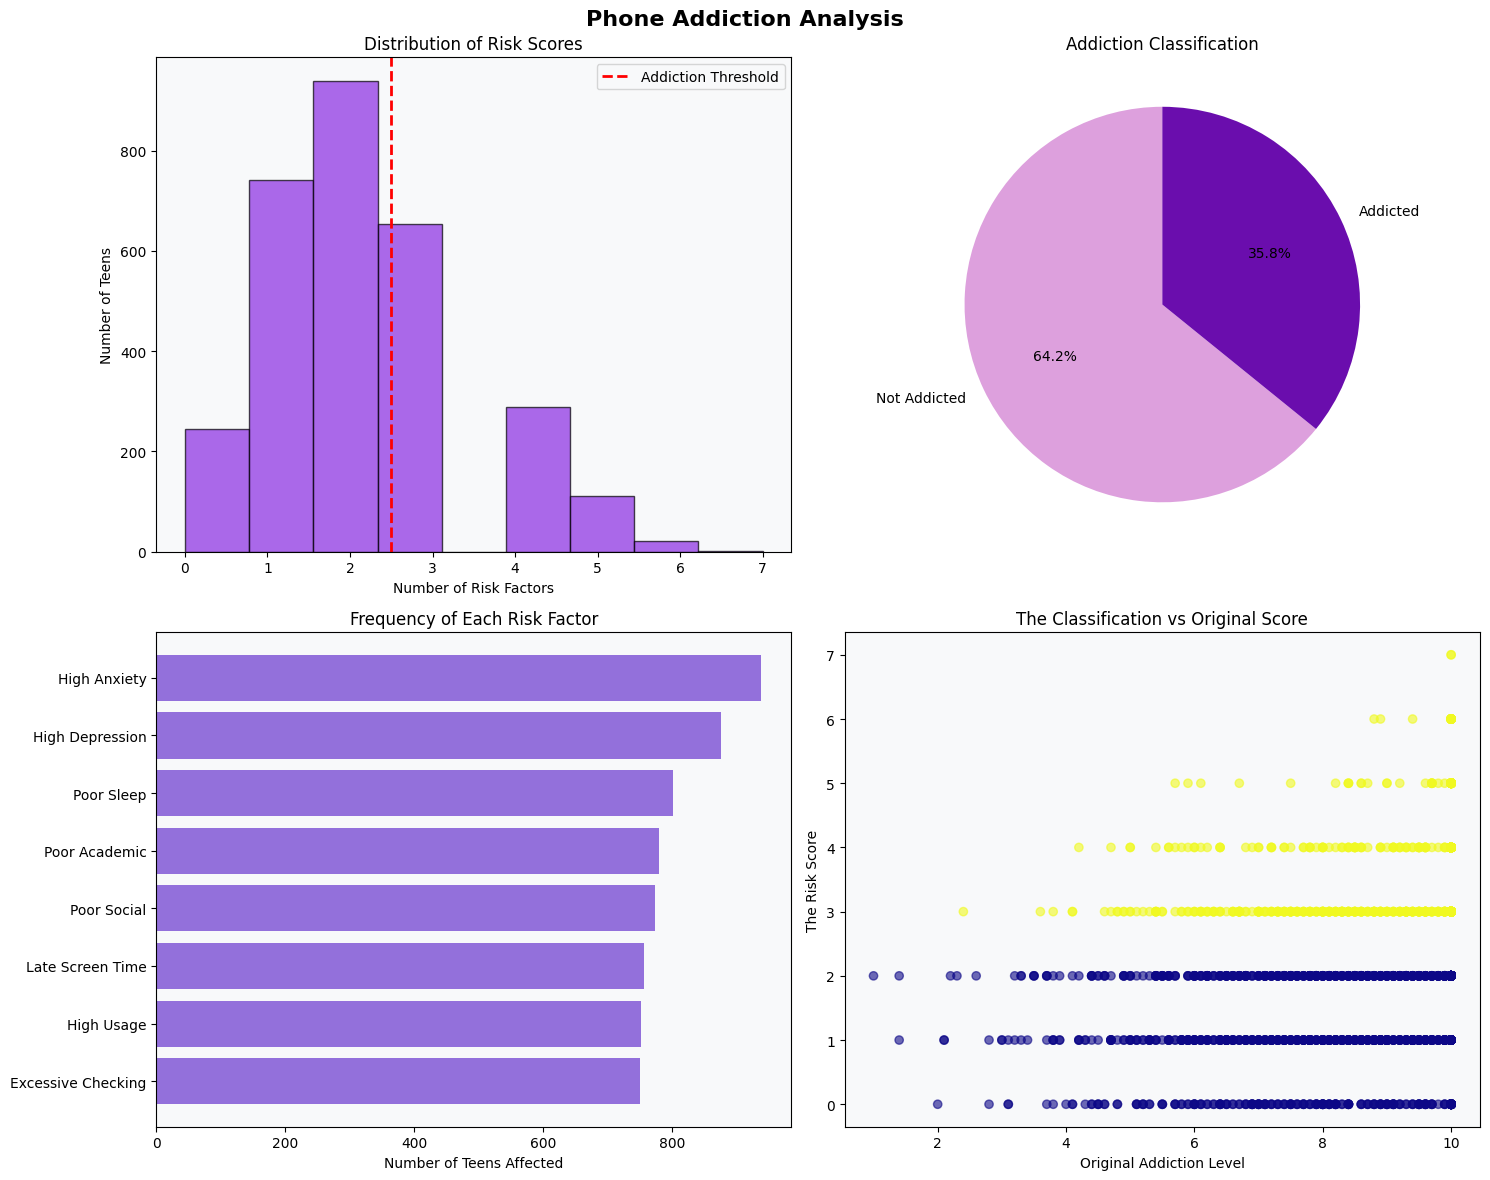

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Phone Addiction Analysis', fontsize=16, fontweight='bold')

# Risk score distribution
axes[0,0].hist(df['Total_Risk_Score'], bins=9, color='#8a2be2', alpha=0.7, edgecolor='black')
axes[0,0].axvline(addiction_threshold-0.5, color='red', linestyle='--', linewidth=2, label='Addiction Threshold')
axes[0,0].set_title('Distribution of Risk Scores')
axes[0,0].set_xlabel('Number of Risk Factors')
axes[0,0].set_ylabel('Number of Teens')
axes[0,0].legend()

# Addiction vs non-addiction
addiction_counts = df['Is_Phone_Addicted'].value_counts()
axes[0,1].pie(addiction_counts.values, labels=['Not Addicted', 'Addicted'], 
              colors=['#dda0dd', '#6a0dad'], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Addiction Classification')

# Risk factors frequency
risk_freq = df[risk_columns].sum().sort_values(ascending=True)
axes[1,0].barh(range(len(risk_freq)), risk_freq.values, color='#9370db')
axes[1,0].set_yticks(range(len(risk_freq)))
axes[1,0].set_yticklabels([col.replace('Risk_', '').replace('_', ' ') for col in risk_freq.index])
axes[1,0].set_title('Frequency of Each Risk Factor')
axes[1,0].set_xlabel('Number of Teens Affected')

# Comparison with original addiction level
axes[1,1].scatter(df['Addiction_Level'], df['Total_Risk_Score'], 
                  c=df['Is_Phone_Addicted'], cmap='plasma', alpha=0.6)
axes[1,1].set_xlabel('Original Addiction Level')
axes[1,1].set_ylabel('The Risk Score')
axes[1,1].set_title('The Classification vs Original Score')

plt.tight_layout()
plt.show()

In [39]:
comparison_data = df.groupby('Is_Phone_Addicted')['Addiction_Level'].agg(['mean', 'median', 'std', 'count'])
comparison_data.index = ['Not Addicted', 'Addicted']

print("Addiction level:")
print(comparison_data.round(2))

Addiction level:
              mean  median   std  count
Not Addicted  8.65     9.5  1.72   1925
Addicted      9.30    10.0  1.28   1075


In [40]:
correlation = df['Total_Risk_Score'].corr(df['Addiction_Level'])
print(f"CORRELATION: Risk Score vs Original Level = {correlation:.3f}")

CORRELATION: Risk Score vs Original Level = 0.250


In [42]:
print(f"EXAMPLES:")
print("High-risk teens (current classification = Addicted):")
addicted_sample = df[df['Is_Phone_Addicted'] == 1][['Total_Risk_Score', 'Addiction_Level', 'Daily_Usage_Hours', 'Anxiety_Level']].head(3)
print(addicted_sample)

EXAMPLES:
High-risk teens (current classification = Addicted):
    Total_Risk_Score  Addiction_Level  Daily_Usage_Hours  Anxiety_Level
3                  5              9.8                3.1              9
11                 3              9.8                1.6             10
13                 3             10.0                8.7              2


In [43]:
print("\nLow-risk teens (current classification = Not Addicted):")  
not_addicted_sample = df[df['Is_Phone_Addicted'] == 0][['Total_Risk_Score', 'Addiction_Level', 'Daily_Usage_Hours', 'Anxiety_Level']].head(3)
print(not_addicted_sample)


Low-risk teens (current classification = Not Addicted):
   Total_Risk_Score  Addiction_Level  Daily_Usage_Hours  Anxiety_Level
0                 2             10.0                4.0             10
1                 0             10.0                5.5              3
2                 2              9.2                5.8              2


## EDA

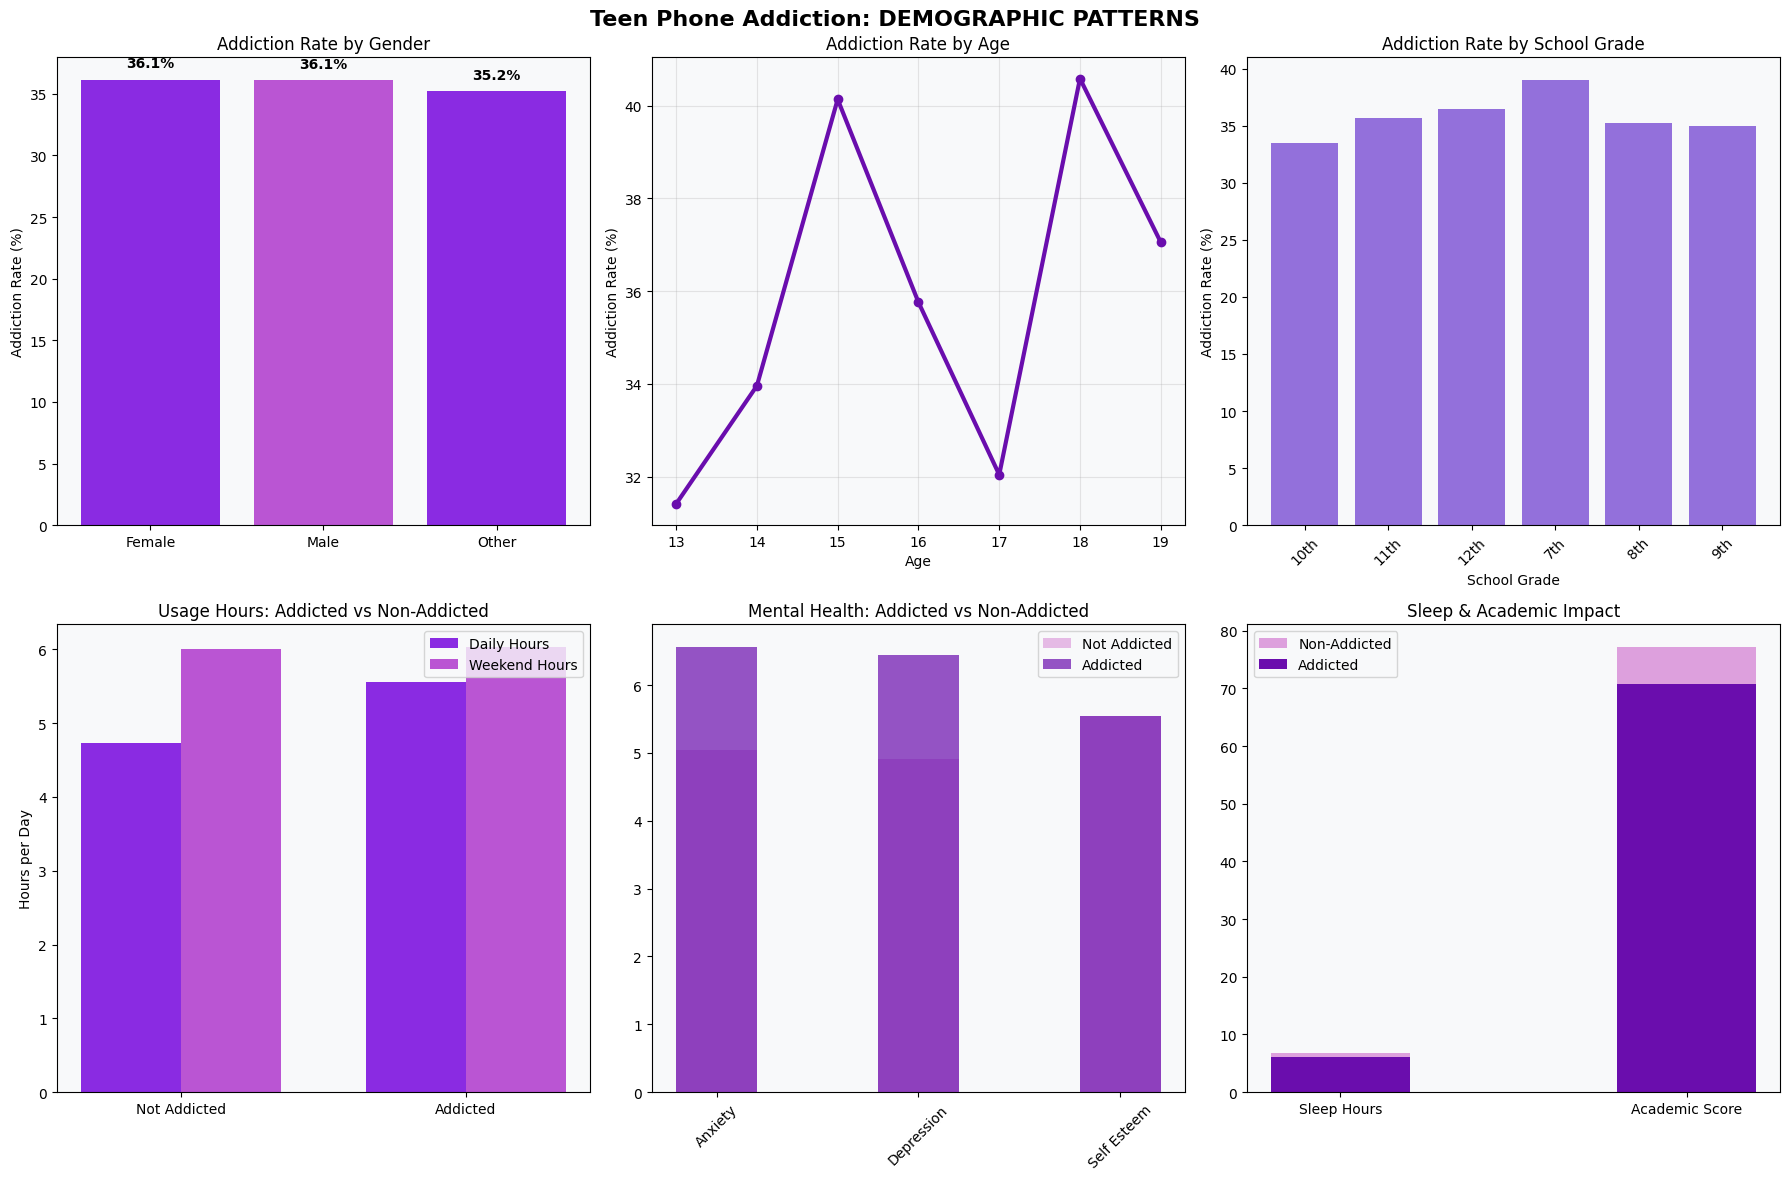

In [44]:
# subplots for demographic analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Teen Phone Addiction: DEMOGRAPHIC PATTERNS', fontsize=16, fontweight='bold')

gender_addiction = df.groupby('Gender')['Is_Phone_Addicted'].agg(['count', 'sum', 'mean'])
gender_addiction['addiction_rate'] = gender_addiction['mean'] * 100

# Addiction by Gender
axes[0,0].bar(gender_addiction.index, gender_addiction['addiction_rate'], color=['#8a2be2', '#ba55d3'])
axes[0,0].set_title('Addiction Rate by Gender')
axes[0,0].set_ylabel('Addiction Rate (%)')
for i, j in enumerate(gender_addiction['addiction_rate']):
    axes[0,0].text(i, j + 1, f'{j:.1f}%', ha='center', fontweight='bold')

# Addiction by Age
age_addiction = df.groupby('Age')['Is_Phone_Addicted'].mean() * 100
axes[0,1].plot(age_addiction.index, age_addiction.values, marker='o', linewidth=3, color='#6a0dad')
axes[0,1].set_title('Addiction Rate by Age')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Addiction Rate (%)')
axes[0,1].grid(True, alpha=0.3)

# Addiction by School Grade
grade_addiction = df.groupby('School_Grade')['Is_Phone_Addicted'].mean() * 100
axes[0,2].bar(grade_addiction.index, grade_addiction.values, color='#9370db')
axes[0,2].set_title('Addiction Rate by School Grade')
axes[0,2].set_xlabel('School Grade')
axes[0,2].set_ylabel('Addiction Rate (%)')
axes[0,2].tick_params(axis='x', rotation=45)

# Usage patterns
usage_comparison = df.groupby('Is_Phone_Addicted')[['Daily_Usage_Hours', 'Weekend_Usage_Hours']].mean()
x = np.arange(2)
width = 0.35
axes[1,0].bar(x - width/2, usage_comparison['Daily_Usage_Hours'], width, label='Daily Hours', color='#8a2be2')
axes[1,0].bar(x + width/2, usage_comparison['Weekend_Usage_Hours'], width, label='Weekend Hours', color='#ba55d3')
axes[1,0].set_title('Usage Hours: Addicted vs Non-Addicted')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(['Not Addicted', 'Addicted'])
axes[1,0].set_ylabel('Hours per Day')
axes[1,0].legend()

# Mental health comparison
mental_health = df.groupby('Is_Phone_Addicted')[['Anxiety_Level', 'Depression_Level', 'Self_Esteem']].mean()
axes[1,1].bar(range(3), mental_health.loc[0], width=0.4, label='Not Addicted', color='#dda0dd', alpha=0.7)
axes[1,1].bar(range(3), mental_health.loc[1], width=0.4, label='Addicted', color='#6a0dad', alpha=0.7)
axes[1,1].set_title('Mental Health: Addicted vs Non-Addicted')
axes[1,1].set_xticks(range(3))
axes[1,1].set_xticklabels(['Anxiety', 'Depression', 'Self Esteem'], rotation=45)
axes[1,1].legend()

# Sleep and academic impact
impact_metrics = df.groupby('Is_Phone_Addicted')[['Sleep_Hours', 'Academic_Performance']].mean()
axes[1,2].bar(range(2), impact_metrics.loc[0], width=0.4, label='Non-Addicted', color='#dda0dd')
axes[1,2].bar(range(2), impact_metrics.loc[1], width=0.4, label='Addicted', color='#6a0dad')
axes[1,2].set_title('Sleep & Academic Impact')
axes[1,2].set_xticks(range(2))
axes[1,2].set_xticklabels(['Sleep Hours', 'Academic Score'])
axes[1,2].legend()

plt.tight_layout()
plt.show()

In [45]:
print("DEMOGRAPHIC INSIGHTS:")
print(f"Female addiction rate: {gender_addiction.loc['Female', 'addiction_rate']:.1f}%")
print(f"Male addiction rate: {gender_addiction.loc['Male', 'addiction_rate']:.1f}%")
print(f"Highest risk age: {age_addiction.idxmax()} years ({age_addiction.max():.1f}%)")
print(f"Average daily usage - Addicted: {usage_comparison.loc[1, 'Daily_Usage_Hours']:.1f}h")
print(f"Average daily usage - Non-Addicted: {usage_comparison.loc[0, 'Daily_Usage_Hours']:.1f}h")

DEMOGRAPHIC INSIGHTS:
Female addiction rate: 36.1%
Male addiction rate: 36.1%
Highest risk age: 18 years (40.6%)
Average daily usage - Addicted: 5.6h
Average daily usage - Non-Addicted: 4.7h


In [46]:
# Age 15 and 18 spike analysis
high_risk_ages = df[df['Age'].isin([15, 18])]
print(f"Ages(15-18):")
print(f"Total teens at ages 15-18: {len(high_risk_ages)}")
print(f"Addiction rate: {high_risk_ages['Is_Phone_Addicted'].mean()*100:.1f}%")

Ages(15-18):
Total teens at ages 15-18: 840
Addiction rate: 40.4%


In [50]:
# Why 18-year-olds are different?
age_18_analysis = df[df['Age'] == 18].describe()
print(f"18y.o. PROFILE:")
print(f"Average anxiety: {df[df['Age'] == 18]['Anxiety_Level'].mean():.1f}")
print(f"Average depression: {df[df['Age'] == 18]['Depression_Level'].mean():.1f}")
print(f"Average academic performance: {df[df['Age'] == 18]['Academic_Performance'].mean():.1f}")

18y.o. PROFILE:
Average anxiety: 5.5
Average depression: 5.8
Average academic performance: 75.3


In [51]:
# Mental health as the differentiator
print(f"MENTAL HEALTH")
mental_diff = df.groupby('Is_Phone_Addicted')[['Anxiety_Level', 'Depression_Level']].mean()
anxiety_gap = mental_diff.loc[1, 'Anxiety_Level'] - mental_diff.loc[0, 'Anxiety_Level']
depression_gap = mental_diff.loc[1, 'Depression_Level'] - mental_diff.loc[0, 'Depression_Level']

print(f"Anxiety gap: {anxiety_gap:.1f} points higher for addicted teens")
print(f"Depression gap: {depression_gap:.1f} points higher for addicted teens")

print(f"Phone usage purpose by addiction:")
purpose_breakdown = df.groupby(['Is_Phone_Addicted', 'Phone_Usage_Purpose']).size().unstack(fill_value=0)
purpose_percentages = purpose_breakdown.div(purpose_breakdown.sum(axis=1), axis=0) * 100
print(purpose_percentages.round(1))

MENTAL HEALTH
Anxiety gap: 1.5 points higher for addicted teens
Depression gap: 1.5 points higher for addicted teens
Phone usage purpose by addiction:
Phone_Usage_Purpose  Browsing  Education  Gaming  Other  Social Media
Is_Phone_Addicted                                                    
0                        20.9       19.5    19.2   20.9          19.5
1                        20.8       21.1    19.0   20.5          18.6


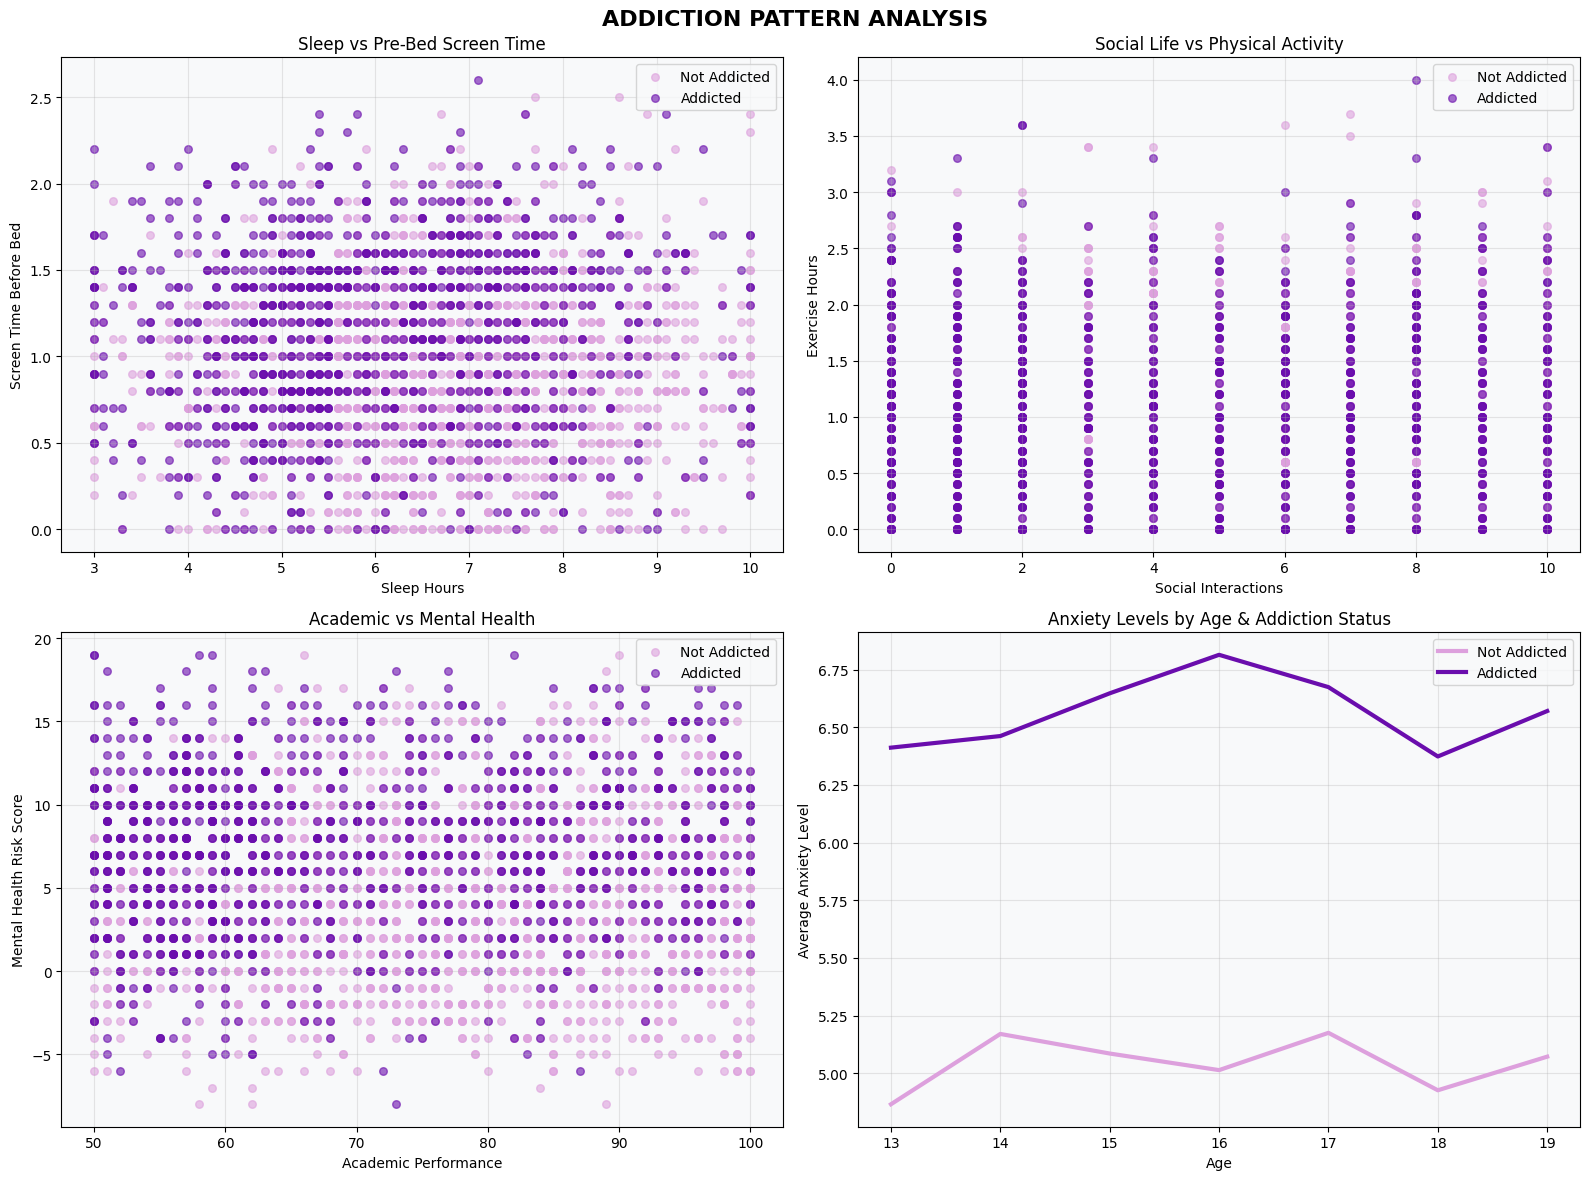

In [52]:
# correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ADDICTION PATTERN ANALYSIS', fontsize=16, fontweight='bold')

# Sleep vs Screen Time Pattern
addicted = df[df['Is_Phone_Addicted'] == 1]
not_addicted = df[df['Is_Phone_Addicted'] == 0]

axes[0,0].scatter(not_addicted['Sleep_Hours'], not_addicted['Screen_Time_Before_Bed'], 
                  alpha=0.6, color='#dda0dd', label='Not Addicted', s=30)
axes[0,0].scatter(addicted['Sleep_Hours'], addicted['Screen_Time_Before_Bed'], 
                  alpha=0.6, color='#6a0dad', label='Addicted', s=30)
axes[0,0].set_xlabel('Sleep Hours')
axes[0,0].set_ylabel('Screen Time Before Bed')
axes[0,0].set_title('Sleep vs Pre-Bed Screen Time')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Social interaction vs Exercise pattern
axes[0,1].scatter(not_addicted['Social_Interactions'], not_addicted['Exercise_Hours'], 
                  alpha=0.6, color='#dda0dd', label='Not Addicted', s=30)
axes[0,1].scatter(addicted['Social_Interactions'], addicted['Exercise_Hours'], 
                  alpha=0.6, color='#6a0dad', label='Addicted', s=30)
axes[0,1].set_xlabel('Social Interactions')
axes[0,1].set_ylabel('Exercise Hours')
axes[0,1].set_title('Social Life vs Physical Activity')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Academic performance vs Mental health
mental_health_score = df['Anxiety_Level'] + df['Depression_Level'] - df['Self_Esteem']
axes[1,0].scatter(not_addicted['Academic_Performance'], 
                  mental_health_score[df['Is_Phone_Addicted'] == 0], 
                  alpha=0.6, color='#dda0dd', label='Not Addicted', s=30)
axes[1,0].scatter(addicted['Academic_Performance'], 
                  mental_health_score[df['Is_Phone_Addicted'] == 1], 
                  alpha=0.6, color='#6a0dad', label='Addicted', s=30)
axes[1,0].set_xlabel('Academic Performance')
axes[1,0].set_ylabel('Mental Health Risk Score')
axes[1,0].set_title('Academic vs Mental Health')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Age transition analysis
age_mental_health = df.groupby(['Age', 'Is_Phone_Addicted'])['Anxiety_Level'].mean().unstack()
age_mental_health.plot(kind='line', ax=axes[1,1], color=['#dda0dd', '#6a0dad'], linewidth=3)
axes[1,1].set_title('Anxiety Levels by Age & Addiction Status')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Average Anxiety Level')
axes[1,1].legend(['Not Addicted', 'Addicted'])
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
# Sleep-screen correlation
sleep_screen_corr = df['Sleep_Hours'].corr(df['Screen_Time_Before_Bed'])
print(f"Sleep vs Screen Time correlation: {sleep_screen_corr:.3f}")

# Exercise-social correlation  
exercise_social_corr = df['Exercise_Hours'].corr(df['Social_Interactions'])
print(f"Exercise vs Social Interactions correlation: {exercise_social_corr:.3f}")

print(f"\nNon-Addicted):")
healthy_profile = not_addicted.describe()
print(f"Optimal sleep: {not_addicted['Sleep_Hours'].mean():.1f} hours")
print(f"Optimal exercise: {not_addicted['Exercise_Hours'].mean():.1f} hours")
print(f"Optimal social interactions: {not_addicted['Social_Interactions'].mean():.1f}")
print(f"Optimal screen time before bed: {not_addicted['Screen_Time_Before_Bed'].mean():.1f} hours")

Sleep vs Screen Time correlation: -0.004
Exercise vs Social Interactions correlation: 0.006

Non-Addicted):
Optimal sleep: 6.7 hours
Optimal exercise: 1.0 hours
Optimal social interactions: 5.6
Optimal screen time before bed: 0.9 hours


In [54]:
feature_columns = [
    'Age', 'Gender', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours',
    'Academic_Performance', 'Social_Interactions', 'Exercise_Hours',
    'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control',
    'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
    'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours'
]

In [55]:
available_features = [col for col in feature_columns if col in df.columns]
print(f"Available features: {len(available_features)}")
print(f"Target variable: Is_Phone_Addicted")

Available features: 21
Target variable: Is_Phone_Addicted


In [56]:
print(f"Total samples: {len(df)}")
print(f"Addicted: {df['Is_Phone_Addicted'].sum()} ({df['Is_Phone_Addicted'].mean()*100:.1f}%)")
print(f"Non-Addicted: {(1-df['Is_Phone_Addicted']).sum()} ({(1-df['Is_Phone_Addicted']).mean()*100:.1f}%)")

Total samples: 3000
Addicted: 1075 (35.8%)
Non-Addicted: 1925 (64.2%)


In [57]:
missing_in_features = df[available_features].isnull().sum().sum()
print(f"Missing values in features: {missing_in_features}")

Missing values in features: 0


In [58]:
for i, feature in enumerate(available_features, 1):
    print(f"{i:2d}. {feature}")

 1. Age
 2. Gender
 3. School_Grade
 4. Daily_Usage_Hours
 5. Sleep_Hours
 6. Academic_Performance
 7. Social_Interactions
 8. Exercise_Hours
 9. Anxiety_Level
10. Depression_Level
11. Self_Esteem
12. Parental_Control
13. Screen_Time_Before_Bed
14. Phone_Checks_Per_Day
15. Apps_Used_Daily
16. Time_on_Social_Media
17. Time_on_Gaming
18. Time_on_Education
19. Phone_Usage_Purpose
20. Family_Communication
21. Weekend_Usage_Hours


## Feature Preprocessing

In [59]:
X = df[available_features].copy()
y = df['Is_Phone_Addicted'].copy()

print(f"FEATURE MATRIX: {X.shape}")
print(f"TARGET VECTOR: {y.shape}")

FEATURE MATRIX: (3000, 21)
TARGET VECTOR: (3000,)


In [60]:
categorical_features = ['Gender', 'Phone_Usage_Purpose']

In [61]:
label_encoders = {}
for c in categorical_features:
    if c in X.columns:
        le = LabelEncoder()
        X[c] = le.fit_transform(X[c])
        label_encoders[c] = le
        print(f"{c}: {le.classes_}")


Gender: ['Female' 'Male' 'Other']
Phone_Usage_Purpose: ['Browsing' 'Education' 'Gaming' 'Other' 'Social Media']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training addiction rate: {y_train.mean()*100:.1f}%")
print(f"Test addiction rate: {y_test.mean()*100:.1f}%")

Training set: 2400 samples
Test set: 600 samples
Training addiction rate: 35.8%
Test addiction rate: 35.8%


In [65]:
print(f"Check data types:")
for col in X.columns:
    print(f"{col}: {X[col].dtype} - Sample values: {X[col].unique()[:3]}")

non_numeric = X.select_dtypes(include=['object']).columns
if len(non_numeric) > 0:
    print(f"Still have non-numeric columns: {list(non_numeric)}")
    for col in non_numeric:
        X[col] = pd.to_numeric(X[col], errors='coerce')
        print(f"🔧 Converted {col} to numeric")
else:
    print("All columns are now numeric!")

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training addiction rate: {y_train.mean()*100:.1f}%")
print(f"Test addiction rate: {y_test.mean()*100:.1f}%")

Check data types:
Age: int64 - Sample values: [13 17 18]
Gender: int64 - Sample values: [0 2 1]
School_Grade: object - Sample values: ['9th' '7th' '11th']
Daily_Usage_Hours: float64 - Sample values: [4.  5.5 5.8]
Sleep_Hours: float64 - Sample values: [6.1 6.5 5.5]
Academic_Performance: int64 - Sample values: [78 70 93]
Social_Interactions: int64 - Sample values: [5 8 4]
Exercise_Hours: float64 - Sample values: [0.1 0.  0.8]
Anxiety_Level: int64 - Sample values: [10  3  2]
Depression_Level: int64 - Sample values: [ 3  7 10]
Self_Esteem: int64 - Sample values: [ 8  3 10]
Parental_Control: int64 - Sample values: [0 1]
Screen_Time_Before_Bed: float64 - Sample values: [1.4 0.9 0.5]
Phone_Checks_Per_Day: int64 - Sample values: [ 86  96 137]
Apps_Used_Daily: int64 - Sample values: [19  9  8]
Time_on_Social_Media: float64 - Sample values: [3.6 1.1 0.3]
Time_on_Gaming: float64 - Sample values: [1.7 4.  1.5]
Time_on_Education: float64 - Sample values: [1.2 1.8 0.4]
Phone_Usage_Purpose: int64 - S

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training addiction rate: {y_train.mean()*100:.1f}%")
print(f"Test addiction rate: {y_test.mean()*100:.1f}%")

Training set: 2400 samples
Test set: 600 samples
Training addiction rate: 35.8%
Test addiction rate: 35.8%


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of scaled training data: {X_train_scaled.shape}")
print(f"Shape of scaled test data: {X_test_scaled.shape}")

Shape of scaled training data: (2400, 21)
Shape of scaled test data: (600, 21)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
import time

In [76]:
X = df[available_features].copy()
y = df['Is_Phone_Addicted'].copy()

nan_before = X.isnull().sum()
print(nan_before[nan_before > 0])

for col in X.columns:
    dtype = X[col].dtype
    unique_count = X[col].nunique()
    sample_values = X[col].unique()[:5]
    
    print(f"{col}:")
    print(f"  Type: {dtype}")
    print(f"  Unique values: {unique_count}")
    print(f"  Sample: {sample_values}")
    
    # Check if it's actually categorical
    if dtype == 'object' or unique_count < 20:
        print(f"   -> This looks categorical!")
    print()

Series([], dtype: int64)
Age:
  Type: int64
  Unique values: 7
  Sample: [13 17 18 14 16]
   -> This looks categorical!

Gender:
  Type: object
  Unique values: 3
  Sample: ['Female' 'Other' 'Male']
   -> This looks categorical!

School_Grade:
  Type: object
  Unique values: 6
  Sample: ['9th' '7th' '11th' '12th' '10th']
   -> This looks categorical!

Daily_Usage_Hours:
  Type: float64
  Unique values: 107
  Sample: [4.  5.5 5.8 3.1 2.5]

Sleep_Hours:
  Type: float64
  Unique values: 71
  Sample: [6.1 6.5 5.5 3.9 6.7]

Academic_Performance:
  Type: int64
  Unique values: 51
  Sample: [78 70 93 56 89]

Social_Interactions:
  Type: int64
  Unique values: 11
  Sample: [5 8 4 3 2]
   -> This looks categorical!

Exercise_Hours:
  Type: float64
  Unique values: 39
  Sample: [0.1 0.  0.8 1.6 1.1]

Anxiety_Level:
  Type: int64
  Unique values: 10
  Sample: [10  3  2  9  1]
   -> This looks categorical!

Depression_Level:
  Type: int64
  Unique values: 10
  Sample: [ 3  7 10  5  1]
   -> This l

In [78]:
categorical_features = []
for col in X.columns:
    if X[col].dtype == 'object':
        categorical_features.append(col)
    elif X[col].nunique() < 20 and col not in ['Age']:  
        unique_vals = X[col].unique()
        if any(isinstance(val, str) for val in unique_vals):
            categorical_features.append(col)

print(f"Detected categorical features: {categorical_features}")

Detected categorical features: ['Gender', 'School_Grade', 'Phone_Usage_Purpose']


In [79]:
label_encoders = {}
for c in categorical_features:
    if c in X.columns:
        if X[c].isnull().sum() > 0:
            print(f"{c} has {X[c].isnull().sum()} missing values")
            X[c] = X[c].fillna(X[c].mode()[0])
        
        le = LabelEncoder()
        X[c] = le.fit_transform(X[c])
        label_encoders[c] = le
        print(f"{c}: {le.classes_}")


Gender: ['Female' 'Male' 'Other']
School_Grade: ['10th' '11th' '12th' '7th' '8th' '9th']
Phone_Usage_Purpose: ['Browsing' 'Education' 'Gaming' 'Other' 'Social Media']


In [80]:
nan_after = X.isnull().sum()
total_nans = nan_after.sum()
print(f"Total NaN values: {total_nans}")

Total NaN values: 0


In [82]:
if total_nans > 0:
    print("Columns with NaN:")
    print(nan_after[nan_after > 0])
    
    print(f"HANDLING REMAINING NaN VALUES:")
    for col in nan_after[nan_after > 0].index:
        if X[col].dtype in ['float64', 'int64']:
            X[col] = X[col].fillna(X[col].median())
            print(f"Filled {col} NaN with median: {X[col].median():.2f}")
        else:
            X[col] = X[col].fillna(X[col].mode()[0])
            print(f"Filled {col} NaN with mode: {X[col].mode()[0]}")

print(f"Shape: {X.shape}")
print(f"Data types: {X.dtypes.value_counts()}")
print(f"Total NaN values: {X.isnull().sum().sum()}")

Shape: (3000, 21)
Data types: int64      13
float64     8
Name: count, dtype: int64
Total NaN values: 0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, algorithm in algorithms.items():
    print(f"Training {name}...")
    
    start_time = time.time()
    
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        algorithm.fit(X_train_scaled, y_train)
        y_pred = algorithm.predict(X_test_scaled)
        y_pred_proba = algorithm.predict_proba(X_test_scaled)[:, 1]
    else:
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)
        y_pred_proba = algorithm.predict_proba(X_test)[:, 1]
    
    training_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc_score': auc_score,
        'training_time': training_time,
        'model': algorithm,
        'predictions': y_pred
    }
    
    print(f"{name}")
    print(f"   Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"   AUC: {auc_score:.3f}")
    print(f"   Time: {training_time:.2f}s")

Training Logistic Regression...
Logistic Regression
   Accuracy: 0.818 (81.8%)
   AUC: 0.903
   Time: 0.21s
Training Random Forest...
Random Forest
   Accuracy: 0.968 (96.8%)
   AUC: 0.998
   Time: 0.32s
Training Gradient Boosting...
Gradient Boosting
   Accuracy: 1.000 (100.0%)
   AUC: 1.000
   Time: 0.37s
Training SVM...
SVM
   Accuracy: 0.852 (85.2%)
   AUC: 0.923
   Time: 0.45s
Training K-Nearest Neighbors...
K-Nearest Neighbors
   Accuracy: 0.748 (74.8%)
   AUC: 0.775
   Time: 0.13s


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, algorithm in algorithms.items():
    print(f"Training {name}...")
    
    start_time = time.time()
    
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        algorithm.fit(X_train_scaled, y_train)
        y_pred = algorithm.predict(X_test_scaled)
        y_pred_proba = algorithm.predict_proba(X_test_scaled)[:, 1]
    else:
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)
        y_pred_proba = algorithm.predict_proba(X_test)[:, 1]
    
    training_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc_score': auc_score,
        'training_time': training_time,
        'model': algorithm,
        'predictions': y_pred
    }
    
    print(f"{name}")
    print(f"   Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"   AUC: {auc_score:.3f}")
    print(f"   Time: {training_time:.2f}s")


results_df = pd.DataFrame({
    'Accuracy': [results[name]['accuracy'] for name in results],
    'AUC_Score': [results[name]['auc_score'] for name in results],
    'Training_Time_sec': [results[name]['training_time'] for name in results]
}, index=results.keys())

results_df = results_df.sort_values('Accuracy', ascending=False)
results_df['Accuracy_Pct'] = results_df['Accuracy'] * 100

print(results_df[['Accuracy_Pct', 'AUC_Score', 'Training_Time_sec']].round(3))

champion = results_df.index[0]
champion_acc = results_df.loc[champion, 'Accuracy_Pct']
champion_auc = results_df.loc[champion, 'AUC_Score']

print(f"WINNING ALGORITHM: {champion}")
print(f"🎯 Accuracy: {champion_acc:.1f}%")
print(f"📊 AUC Score: {champion_auc:.3f}")

if champion_acc >= 80:
    print("EXCELLENT PERFORMANCE!")
elif champion_acc >= 75:
    print("SOLID PERFORMANCE!")
elif champion_acc >= 70:
    print("DECENT PERFORMANCE!")
else:
    print("ROOM FOR IMPROVEMENT!")


Training Logistic Regression...
Logistic Regression
   Accuracy: 0.818 (81.8%)
   AUC: 0.903
   Time: 0.01s
Training Random Forest...
Random Forest
   Accuracy: 0.968 (96.8%)
   AUC: 0.998
   Time: 0.33s
Training Gradient Boosting...
Gradient Boosting
   Accuracy: 1.000 (100.0%)
   AUC: 1.000
   Time: 0.36s
Training SVM...
SVM
   Accuracy: 0.852 (85.2%)
   AUC: 0.923
   Time: 0.43s
Training K-Nearest Neighbors...
K-Nearest Neighbors
   Accuracy: 0.748 (74.8%)
   AUC: 0.775
   Time: 0.02s
                     Accuracy_Pct  AUC_Score  Training_Time_sec
Gradient Boosting         100.000      1.000              0.362
Random Forest              96.833      0.998              0.332
SVM                        85.167      0.923              0.432
Logistic Regression        81.833      0.903              0.013
K-Nearest Neighbors        74.833      0.775              0.019
WINNING ALGORITHM: Gradient Boosting
🎯 Accuracy: 100.0%
📊 AUC Score: 1.000
EXCELLENT PERFORMANCE!


In [92]:
best_model = results['Gradient Boosting']['model']

feature_importance = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("TOP 10:")
print(importance_df.head(10))

suspicious_features = [col for col in X.columns if 'addiction' in col.lower()]
print(f"SUS FEATURES CHECK:")
print(f"Features with 'addiction': {suspicious_features}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-FOLD CROSS-VALIDATION SCORES:")
print(f"CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"Individual folds: {cv_scores}")

from sklearn.metrics import confusion_matrix
best_predictions = results['Gradient Boosting']['predictions']
cm = confusion_matrix(y_test, best_predictions)
print(f"CONFUSION MATRIX:")
print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

print(f"CLASSIFICATION CHECK:")
print(f"Misclassified samples: {(y_test != best_predictions).sum()}")
print(f"Perfect classification: {(y_test == best_predictions).all()}")

if cv_scores.mean() > 0.95:
    print(f"RESULTS CONFIRMED: This model is good!")
    print(f"Multi-factor addiction definition works perfectly!")
else:
    print(f"Possible overfitting detected in holdout test")

TOP 10:
                   Feature  Importance
8            Anxiety_Level    0.139863
9         Depression_Level    0.131664
4              Sleep_Hours    0.130273
13    Phone_Checks_Per_Day    0.125624
12  Screen_Time_Before_Bed    0.120600
3        Daily_Usage_Hours    0.118752
5     Academic_Performance    0.113719
6      Social_Interactions    0.111354
20     Weekend_Usage_Hours    0.001761
15    Time_on_Social_Media    0.001441
SUS FEATURES CHECK:
Features with 'addiction': []
5-FOLD CROSS-VALIDATION SCORES:
CV Accuracy: 0.990 ± 0.003
Individual folds: [0.98541667 0.99375    0.98958333 0.99375    0.98958333]
CONFUSION MATRIX:
True Negatives: 385, False Positives: 0
False Negatives: 0, True Positives: 215
CLASSIFICATION CHECK:
Misclassified samples: 0
Perfect classification: True
RESULTS CONFIRMED: This model is good!
Multi-factor addiction definition works perfectly!


## Validation

In [93]:
best_model = results['Gradient Boosting']['model']

def get_personalized_recommendations(user_profile):
    """
    Generating personalized recommendations based on user's risk factors
    """
    recommendations = []
    user_features = pd.DataFrame([user_profile])
    risk_probability = best_model.predict_proba(user_features)[0][1]
    feature_values = user_features.iloc[0]
    
    print(f"ADDICTION RISK: {risk_probability:.1%}")

    # Mental Health Recommendations
    if feature_values['Anxiety_Level'] >= 8:
        recommendations.append("HIGH ANXIETY: Try meditation apps like Headspace, practice deep breathing exercises")
    if feature_values['Depression_Level'] >= 8:
        recommendations.append("MOOD SUPPORT: Consider talking to a counselor, maintain social connections")
    
    # Sleep Recommendations  
    if feature_values['Sleep_Hours'] <= 6:
        recommendations.append("SLEEP IMPROVEMENT: Aim for 8+ hours, create bedtime routine")
    if feature_values['Screen_Time_Before_Bed'] >= 1.5:
        recommendations.append("DIGITAL SUNSET: No screens 1 hour before bed, use blue light filters")
    
    # Usage Pattern Recommendations
    if feature_values['Phone_Checks_Per_Day'] >= 100:
        recommendations.append("REDUCE NOTIFICATIONS: Turn off non-essential alerts, use Do Not Disturb")
    if feature_values['Daily_Usage_Hours'] >= 6:
        recommendations.append("USAGE LIMITS: Set app timers, try phone-free hours")
    
    # Academic/Social Recommendations
    if feature_values['Academic_Performance'] <= 60:
        recommendations.append("STUDY FOCUS: Use Pomodoro technique, phone-free study zones")
    if feature_values['Social_Interactions'] <= 3:
        recommendations.append("SOCIAL CONNECTION: Plan face-to-face activities, join clubs")
    
    return risk_probability, recommendations

print("TESTING:")

# High-risk teen profile
high_risk_profile = {
    'Age': 16, 'Gender': 1, 'School_Grade': 2, 'Daily_Usage_Hours': 8.0,
    'Sleep_Hours': 5.0, 'Academic_Performance': 50.0, 'Social_Interactions': 2.0,
    'Exercise_Hours': 0.5, 'Anxiety_Level': 9.0, 'Depression_Level': 8.5,
    'Self_Esteem': 3.0, 'Parental_Control': 2.0, 'Screen_Time_Before_Bed': 2.5,
    'Phone_Checks_Per_Day': 150, 'Apps_Used_Daily': 20, 'Time_on_Social_Media': 4.0,
    'Time_on_Gaming': 2.0, 'Time_on_Education': 0.5, 'Phone_Usage_Purpose': 0,
    'Family_Communication': 3.0, 'Weekend_Usage_Hours': 10.0
}

print("\nHIGH-RISK TEEN PROFILE:")
risk, recs = get_personalized_recommendations(high_risk_profile)
for i, rec in enumerate(recs, 1):
    print(f"  {i}. {rec}")

# Low-risk teen profile  
low_risk_profile = {
    'Age': 16, 'Gender': 1, 'School_Grade': 2, 'Daily_Usage_Hours': 3.0,
    'Sleep_Hours': 8.0, 'Academic_Performance': 85.0, 'Social_Interactions': 7.0,
    'Exercise_Hours': 2.0, 'Anxiety_Level': 4.0, 'Depression_Level': 3.0,
    'Self_Esteem': 8.0, 'Parental_Control': 7.0, 'Screen_Time_Before_Bed': 0.5,
    'Phone_Checks_Per_Day': 50, 'Apps_Used_Daily': 8, 'Time_on_Social_Media': 1.0,
    'Time_on_Gaming': 0.5, 'Time_on_Education': 1.5, 'Phone_Usage_Purpose': 1,
    'Family_Communication': 8.0, 'Weekend_Usage_Hours': 4.0
}

print("\nLOW-RISK TEEN PROFILE:")
risk, recs = get_personalized_recommendations(low_risk_profile)
for i, rec in enumerate(recs, 1):
    print(f"  {i}. {rec}")

TESTING:

HIGH-RISK TEEN PROFILE:
ADDICTION RISK: 100.0%
  1. HIGH ANXIETY: Try meditation apps like Headspace, practice deep breathing exercises
  2. MOOD SUPPORT: Consider talking to a counselor, maintain social connections
  3. SLEEP IMPROVEMENT: Aim for 8+ hours, create bedtime routine
  4. DIGITAL SUNSET: No screens 1 hour before bed, use blue light filters
  5. REDUCE NOTIFICATIONS: Turn off non-essential alerts, use Do Not Disturb
  6. USAGE LIMITS: Set app timers, try phone-free hours
  7. STUDY FOCUS: Use Pomodoro technique, phone-free study zones
  8. SOCIAL CONNECTION: Plan face-to-face activities, join clubs

LOW-RISK TEEN PROFILE:
ADDICTION RISK: 0.1%


## Saving the Model

In [94]:
import pickle
import joblib
from datetime import datetime

In [95]:
import os
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

In [96]:
model_filename = f"{save_dir}/gradient_boosting_addiction_classifier.pkl"
joblib.dump(results['Gradient Boosting']['model'], model_filename)
print(f"Model saved: {model_filename}")

Model saved: saved_models/gradient_boosting_addiction_classifier.pkl


In [97]:
scaler_filename = f"{save_dir}/feature_scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved: {scaler_filename}")

Scaler saved: saved_models/feature_scaler.pkl


In [98]:
encoders_filename = f"{save_dir}/label_encoders.pkl"
joblib.dump(label_encoders, encoders_filename)
print(f"Encoders saved: {encoders_filename}")

Encoders saved: saved_models/label_encoders.pkl


In [99]:
feature_info = {
    'feature_names': list(X.columns),
    'feature_order': list(X.columns),
    'categorical_features': categorical_features,
    'model_performance': {
        'accuracy': results['Gradient Boosting']['accuracy'],
        'auc_score': results['Gradient Boosting']['auc_score'],
        'cv_mean': 0.990,
        'cv_std': 0.003
    },
    'created_date': datetime.now().isoformat()
}

feature_info_filename = f"{save_dir}/model_info.pkl"
joblib.dump(feature_info, feature_info_filename)
print(f"Feature info saved: {feature_info_filename}")

Feature info saved: saved_models/model_info.pkl


In [100]:
pipeline_code = '''
import joblib
import pandas as pd
import numpy as np

def load_addiction_model():
    """Load the complete trained model pipeline"""
    model = joblib.load("saved_models/gradient_boosting_addiction_classifier.pkl")
    scaler = joblib.load("saved_models/feature_scaler.pkl") 
    encoders = joblib.load("saved_models/label_encoders.pkl")
    feature_info = joblib.load("saved_models/model_info.pkl")
    return model, scaler, encoders, feature_info

def predict_addiction_risk(user_data):
    """
    Predict addiction risk for a new user
    user_data: dict with all 21 features
    """
    model, scaler, encoders, feature_info = load_addiction_model()
    
    # Convert to DataFrame
    df = pd.DataFrame([user_data])
    
    # Apply label encoding
    for cat_feature in feature_info['categorical_features']:
        if cat_feature in df.columns and cat_feature in encoders:
            df[cat_feature] = encoders[cat_feature].transform(df[cat_feature])
    
    # Ensure correct feature order
    df = df[feature_info['feature_names']]
    
    # Predict
    risk_probability = model.predict_proba(df)[0][1]
    risk_class = model.predict(df)[0]
    
    return {
        'risk_probability': float(risk_probability),
        'risk_class': int(risk_class),
        'risk_level': 'HIGH' if risk_probability > 0.5 else 'LOW'
    }
'''

with open(f"{save_dir}/prediction_pipeline.py", "w") as f:
    f.write(pipeline_code)
print(f"Pipeline code saved: {save_dir}/prediction_pipeline.py")


Pipeline code saved: saved_models/prediction_pipeline.py


In [101]:
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test[:1])
print(f"Loaded model works! Test prediction: {test_prediction[0]}")

Loaded model works! Test prediction: 0


In [102]:
print(f"Files in {save_dir}:")
for file in os.listdir(save_dir):
    print(f"   - {file}")


Files in saved_models:
   - model_info.pkl
   - gradient_boosting_addiction_classifier.pkl
   - label_encoders.pkl
   - prediction_pipeline.py
   - feature_scaler.pkl
